<h1 align="center">Experiment No. 15</h1>
<hr>

<p style="font-size:20px;"><i>$$Write\ a\ program\ to\ find\ the\ response\ of\ a\ low\ pass\ filter\ and\ high\ pass\ filter.,\ when\ a\ speech\ signal\ is\ passed\ through\ these\ filters.$$</i></p>
<hr>

<p style="font-size:20px">Import libraries and plot setup.</p>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, freqz
import sounddevice as sd

In [2]:
def getPlotReady(title='',xLabel='', yLabel='', figSize=None):
    fig = plt.figure()
    if figSize != None:
        fig.set_size_inches(figSize[0], figSize[1])
        
    ax = fig.add_subplot(1,1,1)
    ax.set_title(title,fontdict={'fontsize': 20}, pad=15.0)
    ax.set_xlabel(xLabel,fontdict={'fontsize': 16})
    ax.set_ylabel(yLabel,fontdict={'fontsize': 16})

In [3]:
def getReadySubplot(signals,title = 'Multiple Signal in subplot.', figSize=None):
    numOfPlot = len(signals)
    fig, axes = plt.subplots(numOfPlot, 1) 
    if figSize != None:
        fig.set_size_inches(figSize[0], figSize[1])
    fig.suptitle(title, fontsize=20, y=0.93)
    for index in range(numOfPlot):
        if signals[index]['isDiscrete'] == True:
            axes[index].stem(signals[index]['x'],signals[index]['y'])
        else:
            axes[index].plot(signals[index]['x'],signals[index]['y'])
        axes[index].set_title(signals[index]['title'])
        axes[index].set_xlabel(signals[index]['xlabel'])
        axes[index].set_ylabel(signals[index]['ylabel'])

<p style="font-size:20px">Recording audio...</p>

In [4]:
audioFs = 16000
duration = 5
print("Start recording...")
#Check devices: 
# sd.query_devices()
# t = np.arange(0,duration,1/fs)
# rec = np.sin(2*pi*1000*t) + np.sin(2*pi*500*t)
rec = sd.rec(int(duration * audioFs), audioFs, 1, blocking = 'True')
print("Stop recording!")

Start recording...
Stop recording!


<p style="font-size:20px">Play sound and plot wave</p>

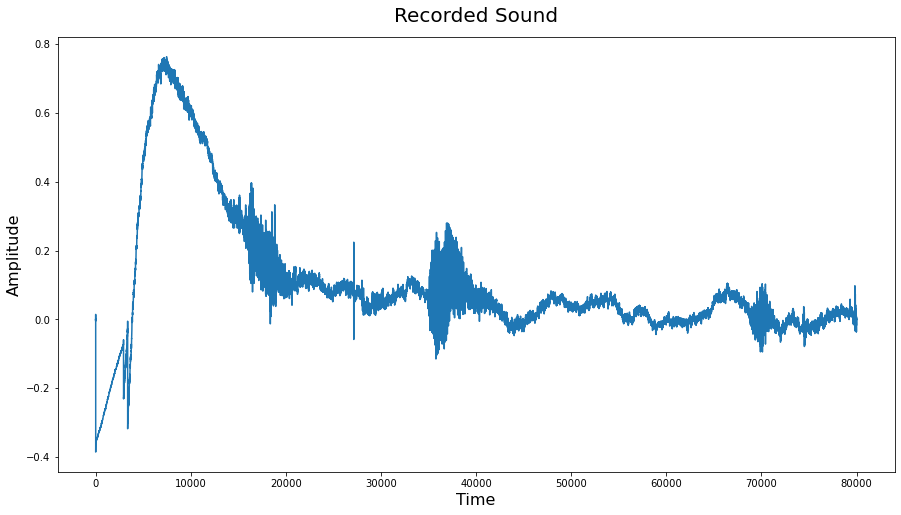

In [5]:
rec = rec.flatten()
sd.play(rec, audioFs, blocking = 'True')
getPlotReady(title='Recorded Sound', xLabel='Time', yLabel='Amplitude', figSize=(15,8))
plt.plot(rec)

<p style="font-size:20px">Impliment Butter Filter.</p>

In [6]:
order = 6
fs = 30.0       
cutoff = 3.667  

def butterFilter(cutoff, fs, filterType, order=5):
    nyq = 0.5 * fs
    normalCutoff = cutoff / nyq
    b, a = butter(order, normalCutoff, btype=filterType, analog=False)
    return b, a

<p style="font-size:20px">Impliment Low Pass Filter.</p>

In [7]:
def lowPassFilter(data, cutoff, fs, filterType='low', order=5):
    b, a = butterFilter(cutoff, fs, filterType, order=order)
    result = lfilter(b, a, data)
    return result

<p style="font-size:20px">Impliment High Pass Filter.</p>

In [8]:
def highPassFilter(data, cutoff, fs, filterType='high', order=5):
    b, a = butterFilter(cutoff, fs, filterType, order=order)
    result = lfilter(b, a, data)
    return result

<p style="font-size:20px">Plotting Frequency Response of the Filter.</p>

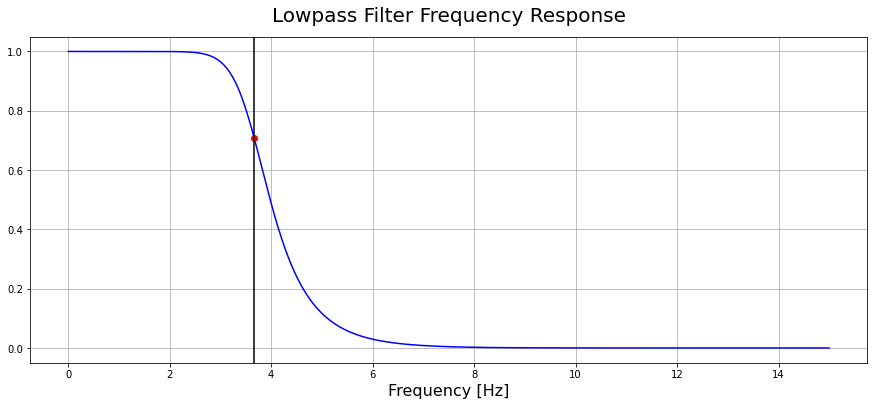

In [9]:
b, a = butterFilter(cutoff, fs, 'low', order)
w, h = freqz(b, a, worN=8000)
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
ax.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
ax.plot(cutoff, 0.5*np.sqrt(2), 'ro')
ax.axvline(cutoff, color='k')
plt.title("Lowpass Filter Frequency Response", fontdict={'fontsize': 20}, pad=15.0)
plt.xlabel('Frequency [Hz]', fontdict={'fontsize': 16})
plt.grid()

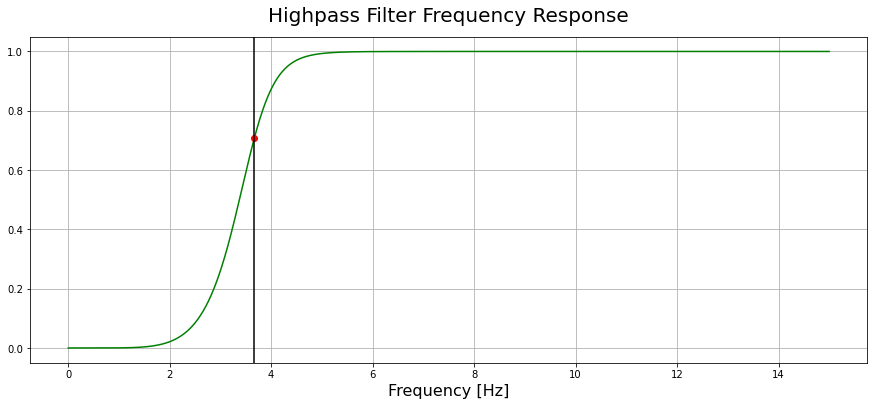

In [10]:
b, a = butterFilter(cutoff, fs, 'high', order)
w, h = freqz(b, a, worN=8000)
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
ax.plot(0.5*fs*w/np.pi, np.abs(h), 'g')
ax.plot(cutoff, 0.5*np.sqrt(2), 'ro')
ax.axvline(cutoff, color='k')
plt.title("Highpass Filter Frequency Response", fontdict={'fontsize': 20}, pad=15.0)
plt.xlabel('Frequency [Hz]', fontdict={'fontsize': 16})
plt.grid()

<p style="font-size:20px">Plotting Filtered Speech Signal.</p>

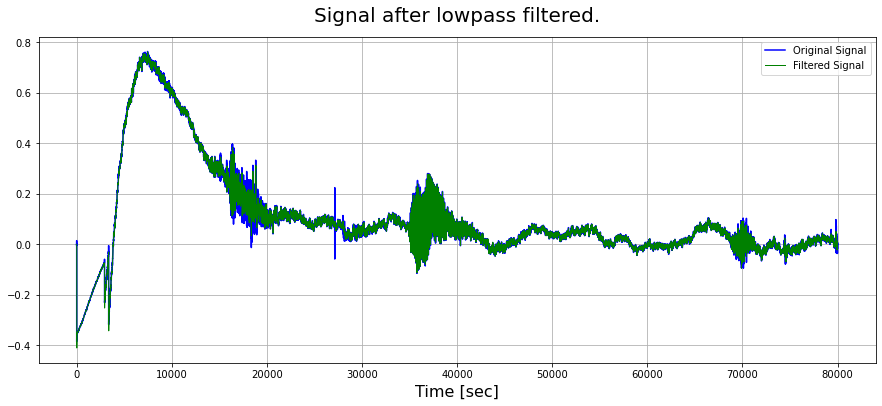

In [11]:
lowfiltSgn = lowPassFilter(rec, cutoff, fs, filterType='low', order=order)
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
ax.plot(rec, 'b-', label='Original Signal')
ax.plot(lowfiltSgn, 'g-', linewidth=1, label='Filtered Signal')
plt.title("Signal after lowpass filtered.", fontdict={'fontsize': 20}, pad=15.0)
plt.xlabel('Time [sec]', fontdict={'fontsize': 16})
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

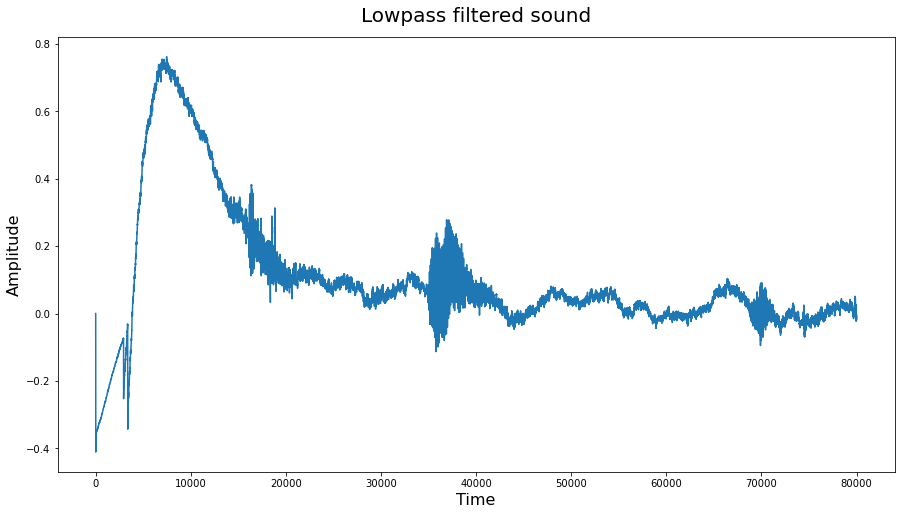

In [12]:
sd.play(lowfiltSgn, audioFs, blocking = 'True')
getPlotReady(title='Lowpass filtered sound', xLabel='Time', yLabel='Amplitude', figSize=(15,8))
plt.plot(lowfiltSgn)

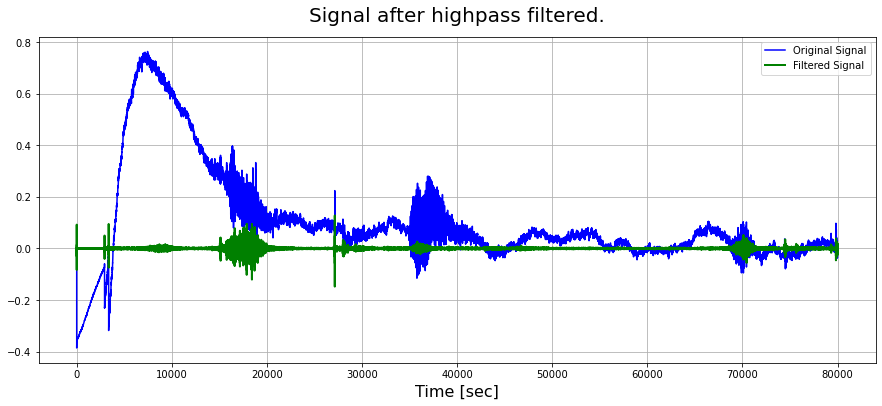

In [13]:
highfiltSgn = highPassFilter(rec, cutoff, fs, filterType='high', order=order)
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
ax.plot(rec, 'b-', label='Original Signal')
ax.plot(highfiltSgn, 'g-', linewidth=2, label='Filtered Signal')
plt.title("Signal after highpass filtered.", fontdict={'fontsize': 20}, pad=15.0)
plt.xlabel('Time [sec]', fontdict={'fontsize': 16})
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

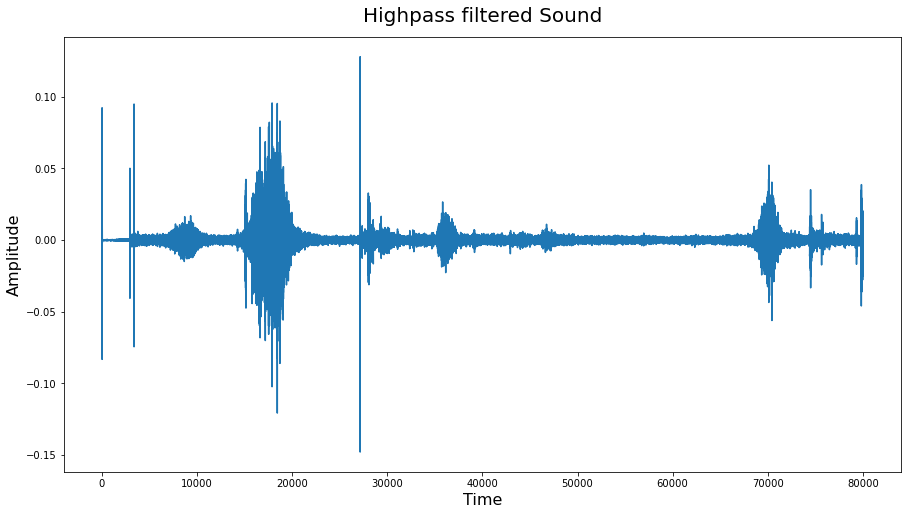

In [14]:
sd.play(highfiltSgn, audioFs, blocking = 'True')
getPlotReady(title='Highpass filtered Sound', xLabel='Time', yLabel='Amplitude', figSize=(15,8))
plt.plot(highfiltSgn)